# Perceptron Binary Classification Learning Algorithm Tutorial

註：這個 Tutorial 主要還是介紹怎麼使用 FukuML，如果非必要並不會涉入太多演算法或數學式的細節，若大家對機器學習有興趣，還是建議觀看完整的課程。

Perceptron Binary Classification Learning Algorithm（PLA）是最基礎的機器學習算法，主要用在讓機器學習分類，基礎我們會使用在二元分類，再慢慢推廣至多元分類。其核心想法也不難，追根究底就是個知錯能改的演算法，只要有錯就修正分類器，直到不會犯錯為止。PLA 也是一個最基礎的類神經網路的運算神經元，現在很紅的 Deep Learning 的最基礎概念其實就是 PLA，因此了解 PLA 對未來學習機器學習這門課程是很有幫助的。

底下列出幾個 PLA 相關的數學式，方便大家日後學習時查閱：

### PLA 假設

$$
h(x) = sign(w^Tx)
$$

表示 PLA 對資料每一個維度的權重假設，這個權重向量在式子中以 w 表示，所以我們利用 PLA 學習出最能夠分好類的 w 之後，將 x 丟進去這個 PLA 假設，它就會告訴你分類的結果。

### PLA 犯錯 

$$
sign(w_t^Tx_{n(t)}) \neq y_{n(t)}
$$

表示 PLA 對哪個資料點是預測錯誤的，其實就是對目前的假設 $w_t$ 對 $x_{n(t)}$ 點進行內積再取正負號，如果與 $y_{n(t)}$ 不同，那就代表 PLA 犯錯了。 

### PLA 修正假設

$$
w_{t+1} = w_t + y_{n(t)}x_{n(t)}
$$

表示 PLA 犯錯之後怎麼修正，如果 PLA 猜 +1 但答案是 -1，那就往 $-1(x_{n(t)})$ 對 $w_t$ 做修正；如果 PLA 猜 -1 但答案是 +1，那就往 $+1(x_{n(t)})$ 對 $w_t$ 做修正。

## 使用 FukuML 的 PLA 做二元分類

接下來讓我們一步一步學習如何使用 FukuML 的 PLA 來做二元分類，首先讓我們將 PLA 引進來：

In [1]:
import FukuML.PLA as pla

然後建構一個 PLA 二元分類物件：

In [2]:
pla_bc = pla.BinaryClassifier()

我希望 FukuML 能儘量簡單易用，因此大家只要牢記 1. 載入訓練資料 -> 2. 設定參數 -> 3. 初始化 -> 4. 訓練 -> 5. 預測 這五個步驟就可以完成機器學習了～

現在第一個步驟要先載入訓練資料，但如果現在要讓大家生出一筆訓練資料應該會有困難，所以 FukuML 每個機器學習演算法都會有一個 Demo 用的內建資料，讓我們先用 Demo 用的內建資料來試試看。

In [3]:
pla_bc.load_train_data()

(array([[ 1.      ,  0.97681 ,  0.10723 ,  0.64385 ,  0.29556 ],
        [ 1.      ,  0.67194 ,  0.2418  ,  0.83075 ,  0.42741 ],
        [ 1.      ,  0.20619 ,  0.23321 ,  0.81004 ,  0.98691 ],
        ..., 
        [ 1.      ,  0.50468 ,  0.99699 ,  0.75136 ,  0.51681 ],
        [ 1.      ,  0.55852 ,  0.067689,  0.666   ,  0.98482 ],
        [ 1.      ,  0.83188 ,  0.66817 ,  0.23403 ,  0.72472 ]]),
 array([ 1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
         1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        -1

這樣就載入了 PLA 的 Demo 訓練資料，不信的話大家可以使用 `pla_bc.train_X` 及 `pla_bc.train_Y` 印出來看看：

In [4]:
print(pla_bc.train_X)

[[ 1.        0.97681   0.10723   0.64385   0.29556 ]
 [ 1.        0.67194   0.2418    0.83075   0.42741 ]
 [ 1.        0.20619   0.23321   0.81004   0.98691 ]
 ..., 
 [ 1.        0.50468   0.99699   0.75136   0.51681 ]
 [ 1.        0.55852   0.067689  0.666     0.98482 ]
 [ 1.        0.83188   0.66817   0.23403   0.72472 ]]


訓練資料的特徵資料就存在 `train_X` 中，矩陣的每一個列就代表一筆資料，然後每一個行就代表一個特徵值，請注意矩陣的第一行都是 1，這是我們演算法自己補上的 $x_0$，並不是原本訓練資料就會有的特徵值，以這個 Demo 資料來說，每筆資料只有 4 個特徵值（feature），像第一筆資料的 4 個特徵值就是 0.97681 0.10723 0.64385 0.29556，演算法將前面補上 $x_0 = 1$，就變成了現在看到的樣子。

In [5]:
print(pla_bc.train_Y)

[ 1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1

然後訓練資料的答案就存在 `train_Y` 中，也就代表每筆訓練資料的答案是什麼，正分類就是 1，負分類就是 -1。

接下來讓我們進行下一步，設定參數：

In [6]:
pla_bc.set_param(loop_mode='naive_cycle', step_alpha=1)

('naive_cycle', 1)

PLA 這個演算法我只提供兩個參數可以調，一個是 `loop_mode`，用來調整 PLA 選擇訓練資料來檢查自己猜錯或猜對的選法，預設是使用 `naive_cycle` ，會照著訓練資料的順序一個一個檢測，有錯就修正 w。你也可以設成使用 `random`，這樣 PLA 檢測時就會隨便選擇一個點來檢測，有錯就修正 w。

另一個參數是 `step_alpha`，用來調整 PLA 每次有錯就修正 w 要修正多少量，原則上設成 1 就可以了。

接下來就可以再進行下一步，初始化：

In [7]:
pla_bc.init_W()

array([ 0.,  0.,  0.,  0.,  0.])

初始化時，我們可以得到一個最初的權重值 w，通常就是個 0 向量了，但有時我們可以用 Linear Regression 來初始化，加速演算法，之後我們會再介紹，一樣我們將初始化的 w 印出來看看：

In [8]:
print(pla_bc.W)

[ 0.  0.  0.  0.  0.]


好！果然是 0 向量，一切準備就緒，接下來就是重頭戲「訓練」了：

In [9]:
pla_bc.train()

array([-3.       ,  3.0841436, -1.583081 ,  2.391305 ,  4.5287635])

登登登！訓練完成，我們會得到一個全新的權重值 w，根據 PLA 的運算，這個 w 可以將資料完全分類正確！這就是機器學習神奇的地方！

我們一樣把 PLA 計算出來的 w 印出來看看：

In [10]:
print(pla_bc.W)

[-3.         3.0841436 -1.583081   2.391305   4.5287635]


果然不是個 0 向量了呢！

有了這個 w，我們就可以用它來預測未來的資料，讓我拿一筆測試資料 0.97959 0.40402 0.96303 0.28133 1 來預測看看，前面 4 個值是這筆測試資料的特徵值，後面的 1 代表這筆測試資料的答案，我們來看看預測結果：

In [11]:
test_data = '0.97959 0.40402 0.96303 0.28133 1'
prediction = pla_bc.prediction(test_data)

將預測結果印出來看看：

In [12]:
print(prediction)

{'prediction': 1.0, 'input_data_x': array([ 1.     ,  0.97959,  0.40402,  0.96303,  0.28133]), 'input_data_y': 1.0}


prediction 這個方法會把預測結果回傳成一個 dictionary，預測結果的 key 是 prediction，value 是 1，測試資料的答案也是 1，所以 PLA 正確預測了結果！

假設我們現在要預測的是未知的資料、一些我們還沒有分好類的資料，那我們就是把資料特徵值向量丟進去 prediction 方法，並設定 ｀`mode='future_data'`，代表是做未知資料的預測，就可以進行預測了，比如丟進去 0.29634 0.4012 0.40266 0.67864 這筆特徵資料試試看：

In [13]:
future_data = '0.29634 0.4012 0.40266 0.67864'
prediction = pla_bc.prediction(future_data, mode='future_data')

將預測結果印出來看看：

In [14]:
print(prediction)

{'prediction': 1.0, 'input_data_x': array([ 1.     ,  0.29634,  0.4012 ,  0.40266,  0.67864]), 'input_data_y': None}


PLA 會忠實的觀察資料給出答案，它認為這筆資料的答案也是 1。（事實上真的是）

當然，如果只是看一、兩筆資料猜對，大家可能會認為這只是運氣好，所以我們必須計算 PLA 在整個訓練資料集及整個測試資料集的預測表現如何。我們提供了很簡易的方法可以計算整體的錯誤率，如果要看 PLA 在整個訓練資料集的預測錯誤率（$E_{in}$）：

In [15]:
print(pla_bc.calculate_avg_error(pla_bc.train_X, pla_bc.train_Y, pla_bc.W))

0.0


PLA 在訓練資料的預測錯誤率是完美的 0！這是當然的，因為 PLA 在線性可分的資料裡，一定會調整到沒有錯誤為止。

現在我們來看看 PLA 在整個測試資料集的預測錯誤率（$E_{out}$），在此之前，我們必須先載入測試資料集，一樣 FukuML 有提供 Demo 版本的測試資料集:

In [16]:
pla_bc.load_test_data()

(array([[ 1.      ,  0.97959 ,  0.40402 ,  0.96303 ,  0.28133 ],
        [ 1.      ,  0.29634 ,  0.4012  ,  0.40266 ,  0.67864 ],
        [ 1.      ,  0.34922 ,  0.99751 ,  0.23234 ,  0.52115 ],
        [ 1.      ,  0.65637 ,  0.7181  ,  0.72843 ,  0.93113 ],
        [ 1.      ,  0.079695,  0.57218 ,  0.70591 ,  0.33812 ],
        [ 1.      ,  0.71206 ,  0.51569 ,  0.18168 ,  0.5557  ],
        [ 1.      ,  0.17528 ,  0.2625  ,  0.8306  ,  0.029669],
        [ 1.      ,  0.93895 ,  0.93941 ,  0.72496 ,  0.95655 ],
        [ 1.      ,  0.046136,  0.94413 ,  0.038311,  0.26812 ],
        [ 1.      ,  0.072491,  0.2242  ,  0.62592 ,  0.67238 ]]),
 array([ 1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.]))

載入測試資料之後，我們就可以計算 PLA 在測試資料集的預測錯誤率（$E_{out}$）：

In [17]:
print(pla_bc.calculate_test_data_avg_error())

0.0


PLA 在測試資料的預測錯誤率也是完美的 0，當然這某種程度是因為我們的 Demo 資料有設計過，不過理論上測試資料的預測錯誤率應該不會和訓練資料的預測錯誤率差太多，只要實驗過程是一個客觀的過程、沒有經過人為的污染，機器學習的演算法的確可以做到正確的預測。

以上，你大概已經學會使用 FukuML 提供的 PLA 做訓練，然後使用訓練完成的 w 來進行未知資料的預測了，真的五個步驟就可以做完了！很簡單吧！

## 使用自己的訓練資料集和測試資料集

前面的教學我們是使用 FukuML 所提供的訓練資料集和測試資料集，真實情況你當然使用自己的資料，那要怎麼做呢？FukuML 提供了很簡易的方法可以讓大家載入自己的資料：

```
your_training_data_file = '/path/to/your/training_data/file'
pla_bc.load_train_data(your_training_data_file)

your_testing_data_file = '/path/to/your/testing_data/file'
pla_bc.load_test_data(your_testing_data_file)
```

就是這麼簡單，讓我們來實際演示一下：

In [18]:
pla_bc = pla.BinaryClassifier()
pla_bc.load_train_data('/Users/fukuball/Projects/fuku-ml/FukuML/dataset/linear_separable_train.dat')

(array([[ 1.        , -0.49475104,  1.60851023],
        [ 1.        ,  0.99350955,  2.53942025],
        [ 1.        ,  0.67365802,  2.41859411],
        [ 1.        , -1.91676615,  0.48923093],
        [ 1.        , -0.80964166,  1.26206511],
        [ 1.        , -0.45285374,  1.82885284],
        [ 1.        ,  0.27463815,  2.08049683],
        [ 1.        ,  0.89694355,  3.7834262 ],
        [ 1.        , -1.72520564,  0.87640485],
        [ 1.        ,  0.7349451 ,  3.39882197],
        [ 1.        , -1.02461018,  1.44258081],
        [ 1.        , -0.60392455,  0.98807458],
        [ 1.        ,  0.08098387,  2.15878467],
        [ 1.        ,  0.48213089,  2.18476304],
        [ 1.        ,  0.74123261,  3.22706092],
        [ 1.        , -0.57649605,  0.27757466],
        [ 1.        , -1.60301663,  0.85311484],
        [ 1.        , -1.90040634,  1.14021401],
        [ 1.        ,  0.7943513 ,  2.68559323],
        [ 1.        ,  0.15398661,  2.61447653],
        [ 1.        

In [19]:
pla_bc.load_test_data('/Users/fukuball/Projects/fuku-ml/FukuML/dataset/linear_separable_test.dat')

(array([[  1.00000000e+00,   3.12179041e-01,   3.26300582e+00],
        [  1.00000000e+00,  -7.88545922e-01,   1.84177454e+00],
        [  1.00000000e+00,   3.45018856e-01,   2.02971487e+00],
        [  1.00000000e+00,  -5.90936663e-02,   2.06095580e+00],
        [  1.00000000e+00,  -6.04229133e-01,   1.89545186e+00],
        [  1.00000000e+00,   2.92639463e-01,   2.21847534e+00],
        [  1.00000000e+00,   1.37291076e+00,   3.10397301e+00],
        [  1.00000000e+00,  -8.55850926e-01,   7.43968659e-01],
        [  1.00000000e+00,  -2.33116362e-04,   1.45262917e+00],
        [  1.00000000e+00,   5.63747692e-01,   2.65759454e+00],
        [  1.00000000e+00,   3.27474170e+00,   5.16394190e-01],
        [  1.00000000e+00,   1.00982446e+00,  -9.92472127e-01],
        [  1.00000000e+00,   1.63602318e+00,  -7.66844250e-01],
        [  1.00000000e+00,   2.81507689e+00,   2.63441093e-01],
        [  1.00000000e+00,   1.83736479e+00,  -8.03493918e-01],
        [  1.00000000e+00,   2.26025418e

看吧，都順利載入資料了，接下來的問題只剩下資料集的格式是怎麼樣，這個可以直接看 FukuML 提供的資料集一窺究竟：

https://github.com/fukuball/fuku-ml/blob/master/FukuML/dataset/pla_binary_train.dat

其實格式真的很簡單，就是將每筆資料的特徵值用空格隔開，然後放成一橫行，然後將這筆資料的答案用空格隔開放在最後，答案是正分類就是 1，負分類就是 -1，這樣就完成了。

所以比如你想做銀行核卡預測，然後審核的特徵是年薪、年齡、性別，那假設小明年薪 100W、年齡 30、性別男性且通過核卡了，那這筆資料就是：

100 30 1 1

假設小華年薪 20W、年齡 25、性別男性，沒有通過核卡，這筆資料就是：

20 25 1 -1

假設小美年薪 30W、年齡 24、性別女性，有過核卡，這筆資料就是：

30 24 0 1

以此類推，簡簡單單、輕輕鬆鬆，大家就可以使用自己的資料來玩玩看機器學習囉～

## 使用二維資料來幫助理解

其實 PLA 分類演算法計算出來的 w 就是去找出一條可以將資料點完美分開的線，書本上的範例可能會使用二維的資料集並畫成圖示呈現給大家看，但在真實世界中，我們的資料通常不會只是二維的，這樣找出來的 w 就會是一個在高維空間將資料完美分類的超平面，我們很難在平面上呈現這樣的結果，因此還是請大家多去從抽象化的高維空間去思考機器學習的過程，不要遷就於圖示。不過如果你剛接觸機器學習，使用二維資料來慢慢理解機器學習演算法也是一個不錯的學習方法，我這邊稍微展示一下如何印出二維資料點及機器學習訓練出來的 w。

載入資料點時，我們就可以在平面上印出所有的資料點，正分類印成紅色的，負分類印成藍色的：

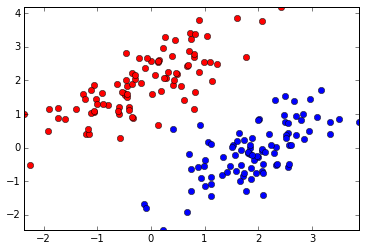

In [20]:
%matplotlib inline

import FukuML.PLA as pla
import matplotlib.pyplot as plt

pla_bc = pla.BinaryClassifier()
pla_bc.load_train_data('/Users/fukuball/Projects/fuku-ml/FukuML/dataset/linear_separable_train.dat')

for idx, val in enumerate(pla_bc.train_Y):
    if val==1:
        plt.plot(pla_bc.train_X[idx,1], pla_bc.train_X[idx,2], "ro")
    else:
        plt.plot(pla_bc.train_X[idx,1], pla_bc.train_X[idx,2], "bo")
        
plt.axis("tight")
plt.show()

機器訓練完之後，我們可以得到 w，這時只要使用 $w_2*x_2+w_1*x_1+w_0*x_0=0$ 的線性方程式找出斜率，就可以在平面上畫出 w：

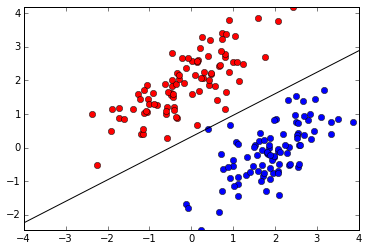

In [21]:
pla_bc.set_param(loop_mode='naive_cycle', step_alpha=1)
pla_bc.init_W()
pla_bc.train()

for idx, val in enumerate(pla_bc.train_Y):
    if val==1:
        plt.plot(pla_bc.train_X[idx,1], pla_bc.train_X[idx,2], "ro")
    else:
        plt.plot(pla_bc.train_X[idx,1], pla_bc.train_X[idx,2], "bo")

a0 = -4;
a1 = (-pla_bc.W[0]-pla_bc.W[1]*a0)/pla_bc.W[2]
b0 = 4;
b1 = (-pla_bc.W[0]-pla_bc.W[1]*b0)/pla_bc.W[2]

plt.plot([a0, b0], [a1, b1], "k")

plt.axis("tight")
plt.show()

這樣就可以畫成圖示了，但記得圖示只是用來幫助理解，在使用或學習機器學習這門課時，千萬不能被圖示牽著走喔！